In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pof
import scipy.stats as sps
sns.set()

plt.rc('font', size=30)
plt.rc('axes', titlesize=30)
plt.rc('axes', labelsize=30)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
plt.rc('legend', fontsize=30)
plt.rc('figure', titlesize=30)

from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.covariance import MinCovDet
import cvxpy as cvx
import yfinance as yf
from tqdm import tqdm

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from warnings import filterwarnings
filterwarnings('default')

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [481]:
%run new_portfolio_optimizer.ipynb
%run helper_functions.ipynb

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Считаем скачанные данные.

In [329]:
data_opened = pd.read_csv('actions yahoo.csv')
data_opened = data_opened.set_index('Date')
data_opened

,AAPL,BAC,T,MO,AA,AXP,DD,ABT,AMAT,AMGN,...,GFRD.L,CWK.L,TSCO.L,TRY.L,TPK.L,SXS.L,REL.L,RE.L,PZC.L,PRV.L
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1990-01-03,0.006710,0.008044,-0.017374,0.014620,0.014875,0.010752,0.018708,0.003610,-0.025639,0.024271,...,0.038455,0.000000,-0.010151,0.018349,0.029941,0.050251,0.004484,0.004405,0.014925,-0.014492
1990-01-04,0.003336,-0.021277,-0.011513,-0.034582,0.001629,-0.010638,-0.016695,-0.001799,-0.013159,0.018958,...,0.000000,0.000000,0.010256,-0.009009,0.046511,0.000000,0.031248,0.000000,0.000000,0.000000
1990-01-05,0.003323,-0.021739,-0.048192,0.005970,-0.009756,-0.010753,-0.005093,-0.010811,-0.013333,0.013953,...,0.012349,0.000000,0.010152,-0.009091,0.000000,0.000000,-0.008656,0.000000,0.000000,0.029412
1990-01-08,0.006621,0.005555,0.016877,-0.026706,0.000000,-0.007246,-0.005120,0.005126,-0.018019,-0.002293,...,0.000000,0.000000,-0.010050,-0.009174,0.000000,0.000000,-0.006551,0.000000,0.000000,-0.028572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.003644,0.003162,0.003632,-0.003840,0.000843,0.010587,0.020000,0.001223,0.020811,0.010202,...,0.025824,-0.007467,0.002782,0.014614,0.003508,0.011025,0.001265,0.053942,0.007216,0.027496
2021-12-27,0.022975,0.004953,-0.003619,0.001927,0.007918,0.001218,0.016170,0.016528,0.046498,0.006167,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-12-28,-0.005767,0.001344,0.001614,0.012610,-0.010697,0.000122,0.008019,-0.006998,-0.018928,0.002665,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Разделим на трейн и тест.

In [330]:
data_train = data_opened[data_opened.index < '2017-01-01']
data_test = data_opened[data_opened.index >= '2017-01-01']

Поработаем с выбросами на трейне и уберем те же колонки на тесте.

In [333]:
idx = (data_train.max(axis=0) < 0.6).index[data_train.max(axis=0) < 0.6] & \
      (data_train.min(axis=0) > -0.6).index[data_train.min(axis=0) > -0.6]
idx

Index(['AAPL', 'BAC', 'T', 'MO', 'AA', 'AXP', 'DD', 'ABT', 'AMAT', 'AMGN',
       ...
       'RTN.L', 'PSON.L', 'IMI.L', 'GFRD.L', 'CWK.L', 'TSCO.L', 'TPK.L',
       'SXS.L', 'REL.L', 'PRV.L'],
      dtype='object', length=811)

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

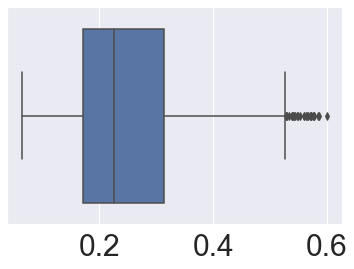

In [331]:
sns.boxplot(data_train[idx].max(axis=0))

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

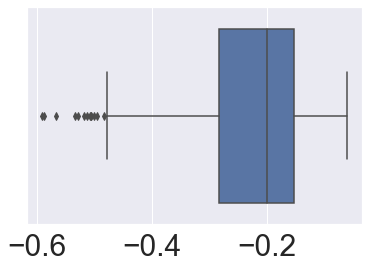

In [332]:
sns.boxplot(data_train[idx].min(axis=0))

In [334]:
data_train = data_train[idx]

In [335]:
data_test = data_test[idx]

Найдем оптимальные значения параметров с помощью `RandomizedSearchCV`.

Без оптимизаций матрицы ковариаций.

In [336]:
po = NewPortfolioOptimizer()
po.get_params()

{'R': 0.002,
 'R_quantille': None,
 'VAR_quantile': 0.05,
 'is_MCD': False,
 'is_PCA': False,
 'is_kenrel_PCA': False,
 'kernel': 'poly',
 'kernelcoef0': 1,
 'kerneldegree': 3,
 'kernelgamma': None,
 'kernelparams': None,
 'metric': 'sharp',
 'n_components': 1,
 'n_top_companies': 20,
 'period_change_portfolio': 360,
 'period_for_pred': 120,
 'risk_free_return': 1,
 'size_of_window': None,
 'smooth_function': None,
 'threshold': 1e-05,
 'verbosity': False}

In [337]:
param_grid = {
    'size_of_window': [None] * 20 + np.linspace(200, 1800, 321, dtype=int).tolist(),
    'n_top_companies': np.linspace(1, 100, 100, dtype=int).tolist(),
    'period_change_portfolio': [None, 120, 240, 360, 480, 720, 900],
    'R_quantille': sps.beta(a=8, b=3)
}

In [338]:
tscv = TimeSeriesSplit(n_splits=4, test_size=1260)

In [339]:
po_randomsearch = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_return=1.02), 
    param_distributions=param_grid,
    cv=tscv,
    verbose=0,
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=16  # seed для фиксации генератора случайных чисел
)

In [340]:
%%time
po_randomsearch.fit(data_train)

CPU times: total: 11.3 s
Wall time: 35.6 s


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(risk_free_return=1.02),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC8322E610>,
                                        'n_top_companies': [1, 2, 3, 4, 5, 6, 7,
                                                            8, 9, 10, 11, 12,
                                                            13, 14, 15, 16, 17,
                                                            18, 19, 20, 21, 22,
                                                            23, 24, 25, 26, 27,
                                                            28, 29, 30, ...],
                                        'period_change_portfolio': [None, 120,
                                                                    240, 360,
                       

In [341]:
po_randomsearch.best_score_

0.825601103810973

In [342]:
po_randomsearch.best_params_

{'R_quantille': 0.76681366796191,
 'n_top_companies': 90,
 'period_change_portfolio': None,
 'size_of_window': 510}

In [279]:
po = NewPortfolioOptimizer(risk_free_return=1.02, **po_randomsearch.best_params_)
po.fit(data_train)
pred = po.predict(data_test)[1].iloc[-1]
pred

2.2040739091239723

In [280]:
po.w_

[array([0.00187549, 0.02587714, 0.01119631, 0.00657808, 0.04950767,
        0.01969851, 0.00012711, 0.        , 0.0196887 , 0.        ,
        0.        , 0.        , 0.        , 0.00340733, 0.01732205,
        0.07610132, 0.05853507, 0.01450088, 0.        , 0.        ,
        0.02681983, 0.        , 0.0271808 , 0.10578247, 0.        ,
        0.        , 0.03000074, 0.        , 0.03218947, 0.        ,
        0.        , 0.        , 0.02653623, 0.01413385, 0.03980593,
        0.        , 0.        , 0.        , 0.        , 0.03002167,
        0.        , 0.03056412, 0.        , 0.0082087 , 0.09653663,
        0.        , 0.        , 0.03363025, 0.00645987, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01967418, 0.        , 0.        , 0.01440228,
        0.0037971 , 0.01276564, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00025578,
        0.0513982 , 0.02071261, 0.        , 0.  

In [281]:
po = po_randomsearch.best_estimator_
po.refit(data_train)
pred = po.predict(data_test)[1].iloc[-1]
pred

2.2040739091239723

In [282]:
R_quantille_grid = np.linspace(0.1, 0.95, 19)

max_pred = 0
best_R_quantille = None
po.fit(data_train)
for R_quantille in tqdm(R_quantille_grid):
    po = NewPortfolioOptimizer(risk_free_return=1.02, **po_randomsearch.best_params_).set_params(R_quantille=R_quantille)
    po.refit(data_train)
    pred = po.predict(data_test)[1].iloc[-1]
    print(pred)
    if pred > max_pred:
        best_R_quantille = R_quantille
        max_pred = pred
        
best_R_quantille, max_pred

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\214338416.py:193: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio

  5%|▌         | 1/19 [00:01<00:21,  1.19s/it]

0.9991068669342047


 11%|█         | 2/19 [00:02<00:22,  1.33s/it]

1.1588805755757947


 16%|█▌        | 3/19 [00:03<00:20,  1.29s/it]

1.2482114018734602


 21%|██        | 4/19 [00:04<00:17,  1.19s/it]

1.3214221435366604


 26%|██▋       | 5/19 [00:05<00:15,  1.13s/it]

1.3815323217351856


 32%|███▏      | 6/19 [00:06<00:14,  1.08s/it]

1.4173818815314436


 37%|███▋      | 7/19 [00:07<00:11,  1.05it/s]

1.4362513864746875


 42%|████▏     | 8/19 [00:08<00:10,  1.09it/s]

1.4596183410870873


 47%|████▋     | 9/19 [00:09<00:08,  1.15it/s]

1.499553826069031


 53%|█████▎    | 10/19 [00:09<00:07,  1.27it/s]

1.5573019173462563


 58%|█████▊    | 11/19 [00:10<00:06,  1.26it/s]

1.6273627136598345


 63%|██████▎   | 12/19 [00:11<00:05,  1.36it/s]

1.6775923016676402


 68%|██████▊   | 13/19 [00:11<00:04,  1.40it/s]

1.7323714837627948


 74%|███████▎  | 14/19 [00:12<00:03,  1.41it/s]

1.7979989486896166


 79%|███████▉  | 15/19 [00:14<00:03,  1.08it/s]

2.1920976712100373


 84%|████████▍ | 16/19 [00:14<00:02,  1.12it/s]

2.601912160981352


 89%|████████▉ | 17/19 [00:15<00:01,  1.23it/s]

3.109919804695052


 95%|█████████▍| 18/19 [00:16<00:00,  1.30it/s]

4.153707645624816


100%|██████████| 19/19 [00:16<00:00,  1.13it/s]

5.348898617157766


(0.95, 5.348898617157766)

In [283]:
plot_results(names=['Без оптимизаций'], optimizers=[po_randomsearch], df_train=data_train, df_test=data_test, 
             title='Return лучших моделей из каждого метода')

1it [00:01,  1.10s/it]
C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



PCA.

In [425]:
%run new_portfolio_optimizer.ipynb
%run helper_functions.ipynb

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [426]:
po = NewPortfolioOptimizer(risk_free_return=1.02, is_PCA=True, R_quantille=0.75, n_top_companies=50, n_components=20)
po.fit(data_train)
po.predict(data_test)

(array([1.06558041, 1.09959114, 1.0901579 , 0.82426867, 1.06278834,
        1.05869655, 0.75422247, 1.50985473, 1.42225676, 0.98106961,
        0.93819085]),
 2017-01-03    1.004689
 2017-01-04    1.020272
 2017-01-05    1.016862
 2017-01-06    1.011489
 2017-01-09    1.014567
                 ...   
 2021-12-23    1.609698
 2021-12-27    1.627744
 2021-12-28    1.619736
 2021-12-29    1.622848
 2021-12-30    1.607371
 Length: 1258, dtype: float64)

In [427]:
param_grid_PCA = {
    'size_of_window': [None] * 20 + np.linspace(200, 1800, 65, dtype=int).tolist(),
    'n_top_companies': np.linspace(50, 100, 11, dtype=int).tolist(),
    'period_change_portfolio': [None, 120, 240, 360, 480, 720, 900],
    'R_quantille': sps.beta(a=8, b=3),
    'n_components': np.linspace(5, 30, 26, dtype=int)
}

In [428]:
po_randomsearch_PCA = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_return=1.02, is_PCA=True), 
    param_distributions=param_grid_PCA,
    cv=tscv,
    verbose=2,
    n_jobs=1,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=16  # seed для фиксации генератора случайных чисел
)

In [429]:
%%time
po_randomsearch_PCA.fit(data_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
[CV] END R_quantille=0.902366679645297, n_components=9, n_top_companies=95, period_change_portfolio=None, size_of_window=None; total time=   0.4s
[CV] END R_quantille=0.902366679645297, n_components=9, n_top_companies=95, period_change_portfolio=None, size_of_window=None; total time=   0.4s
[CV] END R_quantille=0.902366679645297, n_components=9, n_top_companies=95, period_change_portfolio=None, size_of_window=None; total time=   0.4s
[CV] END R_quantille=0.902366679645297, n_components=9, n_top_companies=95, period_change_portfolio=None, size_of_window=None; total time=   0.4s
[CV] END R_quantille=0.7577227813275663, n_components=15, n_top_companies=60, period_change_portfolio=480, size_of_window=1650; total time=   0.4s
[CV] END R_quantille=0.7577227813275663, n_components=15, n_top_companies=60, period_change_portfolio=480, size_of_window=1650; total time=   0.4s
[CV] END R_quantille=0.7577227813275663, n_components=15, n

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7228816663021559, n_components=6, n_top_companies=95, period_change_portfolio=480, size_of_window=250; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7228816663021559, n_components=6, n_top_companies=95, period_change_portfolio=480, size_of_window=250; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7228816663021559, n_components=6, n_top_companies=95, period_change_portfolio=480, size_of_window=250; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7228816663021559, n_components=6, n_top_companies=95, period_change_portfolio=480, size_of_window=250; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7992990100350376, n_components=14, n_top_companies=65, period_change_portfolio=360, size_of_window=250; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7992990100350376, n_components=14, n_top_companies=65, period_change_portfolio=360, size_of_window=250; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7992990100350376, n_components=14, n_top_companies=65, period_change_portfolio=360, size_of_window=250; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7992990100350376, n_components=14, n_top_companies=65, period_change_portfolio=360, size_of_window=250; total time=   0.5s
[CV] END R_quantille=0.3700472275793296, n_components=30, n_top_companies=85, period_change_portfolio=720, size_of_window=None; total time=   0.5s
[CV] END R_quantille=0.3700472275793296, n_components=30, n_top_companies=85, period_change_portfolio=720, size_of_window=None; total time=   0.5s
[CV] END R_quantille=0.3700472275793296, n_components=30, n_top_companies=85, period_change_portfolio=720, size_of_window=None; total time=   0.5s
[CV] END R_quantille=0.3700472275793296, n_components=30, n_top_companies=85, period_change_portfolio=720, size_of_window=None; total time=   0.6s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7373162600226665, n_components=7, n_top_companies=70, period_change_portfolio=900, size_of_window=775; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7373162600226665, n_components=7, n_top_companies=70, period_change_portfolio=900, size_of_window=775; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7373162600226665, n_components=7, n_top_companies=70, period_change_portfolio=900, size_of_window=775; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7373162600226665, n_components=7, n_top_companies=70, period_change_portfolio=900, size_of_window=775; total time=   0.3s
[CV] END R_quantille=0.6990035157567618, n_components=10, n_top_companies=55, period_change_portfolio=720, size_of_window=1325; total time=   0.3s
[CV] END R_quantille=0.6990035157567618, n_components=10, n_top_companies=55, period_change_portfolio=720, size_of_window=1325; total time=   0.3s
[CV] END R_quantille=0.6990035157567618, n_components=10, n_top_companies=55, period_change_portfolio=720, size_of_window=1325; total time=   0.3s
[CV] END R_quantille=0.6990035157567618, n_components=10, n_top_companies=55, period_change_portfolio=720, size_of_window=1325; total time=   0.3s
[CV] END R_quantille=0.9483424369409232, n_components=23, n_top_companies=95, period_change_portfolio=360, size_of_window=1075; total time=   0.7s
[CV] END R_quantille=0.9483424369409232, n_components=23, n_top_companies=95, period_change_portfolio=360, size_of_windo

[CV] END R_quantille=0.7587567059830894, n_components=25, n_top_companies=75, period_change_portfolio=720, size_of_window=950; total time=   0.4s
[CV] END R_quantille=0.7963358074415035, n_components=6, n_top_companies=50, period_change_portfolio=720, size_of_window=900; total time=   0.2s
[CV] END R_quantille=0.7963358074415035, n_components=6, n_top_companies=50, period_change_portfolio=720, size_of_window=900; total time=   0.2s
[CV] END R_quantille=0.7963358074415035, n_components=6, n_top_companies=50, period_change_portfolio=720, size_of_window=900; total time=   0.2s
[CV] END R_quantille=0.7963358074415035, n_components=6, n_top_companies=50, period_change_portfolio=720, size_of_window=900; total time=   0.3s
[CV] END R_quantille=0.5794755452120255, n_components=22, n_top_companies=80, period_change_portfolio=None, size_of_window=1100; total time=   0.3s
[CV] END R_quantille=0.5794755452120255, n_components=22, n_top_companies=80, period_change_portfolio=None, size_of_window=110

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8126598314256709, n_components=8, n_top_companies=95, period_change_portfolio=720, size_of_window=325; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8126598314256709, n_components=8, n_top_companies=95, period_change_portfolio=720, size_of_window=325; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8126598314256709, n_components=8, n_top_companies=95, period_change_portfolio=720, size_of_window=325; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8126598314256709, n_components=8, n_top_companies=95, period_change_portfolio=720, size_of_window=325; total time=   0.5s
[CV] END R_quantille=0.7778003194990809, n_components=5, n_top_companies=65, period_change_portfolio=360, size_of_window=1525; total time=   0.5s
[CV] END R_quantille=0.7778003194990809, n_components=5, n_top_companies=65, period_change_portfolio=360, size_of_window=1525; total time=   0.5s


C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\cvxpy\problems\problem.py:1278: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.



[CV] END R_quantille=0.7778003194990809, n_components=5, n_top_companies=65, period_change_portfolio=360, size_of_window=1525; total time=   0.5s
[CV] END R_quantille=0.7778003194990809, n_components=5, n_top_companies=65, period_change_portfolio=360, size_of_window=1525; total time=   0.5s
[CV] END R_quantille=0.8553348152821326, n_components=16, n_top_companies=75, period_change_portfolio=360, size_of_window=1325; total time=   0.6s
[CV] END R_quantille=0.8553348152821326, n_components=16, n_top_companies=75, period_change_portfolio=360, size_of_window=1325; total time=   0.5s
[CV] END R_quantille=0.8553348152821326, n_components=16, n_top_companies=75, period_change_portfolio=360, size_of_window=1325; total time=   0.6s
[CV] END R_quantille=0.8553348152821326, n_components=16, n_top_companies=75, period_change_portfolio=360, size_of_window=1325; total time=   0.6s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.865191013352748, n_components=21, n_top_companies=75, period_change_portfolio=360, size_of_window=250; total time=   0.6s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.865191013352748, n_components=21, n_top_companies=75, period_change_portfolio=360, size_of_window=250; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.865191013352748, n_components=21, n_top_companies=75, period_change_portfolio=360, size_of_window=250; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.865191013352748, n_components=21, n_top_companies=75, period_change_portfolio=360, size_of_window=250; total time=   0.6s
[CV] END R_quantille=0.483487790523618, n_components=12, n_top_companies=80, period_change_portfolio=240, size_of_window=1600; total time=   0.7s
[CV] END R_quantille=0.483487790523618, n_components=12, n_top_companies=80, period_change_portfolio=240, size_of_window=1600; total time=   0.7s
[CV] END R_quantille=0.483487790523618, n_components=12, n_top_companies=80, period_change_portfolio=240, size_of_window=1600; total time=   0.8s
[CV] END R_quantille=0.483487790523618, n_components=12, n_top_companies=80, period_change_portfolio=240, size_of_window=1600; total time=   0.8s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.6730229588070017, n_components=12, n_top_companies=55, period_change_portfolio=900, size_of_window=475; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.6730229588070017, n_components=12, n_top_companies=55, period_change_portfolio=900, size_of_window=475; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.6730229588070017, n_components=12, n_top_companies=55, period_change_portfolio=900, size_of_window=475; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.6730229588070017, n_components=12, n_top_companies=55, period_change_portfolio=900, size_of_window=475; total time=   0.3s
[CV] END R_quantille=0.7952985544803669, n_components=24, n_top_companies=85, period_change_portfolio=240, size_of_window=1800; total time=   0.8s
[CV] END R_quantille=0.7952985544803669, n_components=24, n_top_companies=85, period_change_portfolio=240, size_of_window=1800; total time=   0.9s
[CV] END R_quantille=0.7952985544803669, n_components=24, n_top_companies=85, period_change_portfolio=240, size_of_window=1800; total time=   0.9s
[CV] END R_quantille=0.7952985544803669, n_components=24, n_top_companies=85, period_change_portfolio=240, size_of_window=1800; total time=   0.9s
[CV] END R_quantille=0.7978980983906622, n_components=25, n_top_companies=60, period_change_portfolio=480, size_of_window=1750; total time=   0.4s
[CV] END R_quantille=0.7978980983906622, n_components=25, n_top_companies=60, period_change_portfolio=480, size_of_wind

[CV] END R_quantille=0.7204314336105667, n_components=26, n_top_companies=80, period_change_portfolio=720, size_of_window=None; total time=   0.4s
[CV] END R_quantille=0.7204314336105667, n_components=26, n_top_companies=80, period_change_portfolio=720, size_of_window=None; total time=   0.5s
[CV] END R_quantille=0.7204314336105667, n_components=26, n_top_companies=80, period_change_portfolio=720, size_of_window=None; total time=   0.5s
[CV] END R_quantille=0.7204314336105667, n_components=26, n_top_companies=80, period_change_portfolio=720, size_of_window=None; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7895237532572481, n_components=17, n_top_companies=95, period_change_portfolio=480, size_of_window=325; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7895237532572481, n_components=17, n_top_companies=95, period_change_portfolio=480, size_of_window=325; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7895237532572481, n_components=17, n_top_companies=95, period_change_portfolio=480, size_of_window=325; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7895237532572481, n_components=17, n_top_companies=95, period_change_portfolio=480, size_of_window=325; total time=   0.6s
[CV] END R_quantille=0.9323386928350441, n_components=15, n_top_companies=50, period_change_portfolio=120, size_of_window=1375; total time=   0.9s
[CV] END R_quantille=0.9323386928350441, n_components=15, n_top_companies=50, period_change_portfolio=120, size_of_window=1375; total time=   0.9s
[CV] END R_quantille=0.9323386928350441, n_components=15, n_top_companies=50, period_change_portfolio=120, size_of_window=1375; total time=   1.0s
[CV] END R_quantille=0.9323386928350441, n_components=15, n_top_companies=50, period_change_portfolio=120, size_of_window=1375; total time=   1.0s
[CV] END R_quantille=0.870620628985638, n_components=20, n_top_companies=85, period_change_portfolio=480, size_of_window=1050; total time=   0.5s
[CV] END R_quantille=0.870620628985638, n_components=20, n_top_companies=85, period_change_portfolio=480, size_of_window

[CV] END R_quantille=0.41122482612174727, n_components=17, n_top_companies=95, period_change_portfolio=360, size_of_window=975; total time=   0.8s
[CV] END R_quantille=0.783763366438407, n_components=6, n_top_companies=80, period_change_portfolio=240, size_of_window=250; total time=   0.7s
[CV] END R_quantille=0.783763366438407, n_components=6, n_top_companies=80, period_change_portfolio=240, size_of_window=250; total time=   0.7s
[CV] END R_quantille=0.783763366438407, n_components=6, n_top_companies=80, period_change_portfolio=240, size_of_window=250; total time=   0.7s
[CV] END R_quantille=0.783763366438407, n_components=6, n_top_companies=80, period_change_portfolio=240, size_of_window=250; total time=   0.7s
[CV] END R_quantille=0.762461058414662, n_components=16, n_top_companies=55, period_change_portfolio=720, size_of_window=1425; total time=   0.3s
[CV] END R_quantille=0.762461058414662, n_components=16, n_top_companies=55, period_change_portfolio=720, size_of_window=1425; tota

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5799414349929564, n_components=13, n_top_companies=65, period_change_portfolio=720, size_of_window=400; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5799414349929564, n_components=13, n_top_companies=65, period_change_portfolio=720, size_of_window=400; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5799414349929564, n_components=13, n_top_companies=65, period_change_portfolio=720, size_of_window=400; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5799414349929564, n_components=13, n_top_companies=65, period_change_portfolio=720, size_of_window=400; total time=   0.3s
[CV] END R_quantille=0.23884541582157945, n_components=18, n_top_companies=70, period_change_portfolio=None, size_of_window=575; total time=   0.3s
[CV] END R_quantille=0.23884541582157945, n_components=18, n_top_companies=70, period_change_portfolio=None, size_of_window=575; total time=   0.3s
[CV] END R_quantille=0.23884541582157945, n_components=18, n_top_companies=70, period_change_portfolio=None, size_of_window=575; total time=   0.3s
[CV] END R_quantille=0.23884541582157945, n_components=18, n_top_companies=70, period_change_portfolio=None, size_of_window=575; total time=   0.3s
[CV] END R_quantille=0.872443235038483, n_components=25, n_top_companies=75, period_change_portfolio=480, size_of_window=800; total time=   0.5s
[CV] END R_quantille=0.872443235038483, n_components=25, n_top_companies=75, period_change_portfolio=480, size_of_win

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5749210787682906, n_components=7, n_top_companies=55, period_change_portfolio=900, size_of_window=250; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5749210787682906, n_components=7, n_top_companies=55, period_change_portfolio=900, size_of_window=250; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5749210787682906, n_components=7, n_top_companies=55, period_change_portfolio=900, size_of_window=250; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5749210787682906, n_components=7, n_top_companies=55, period_change_portfolio=900, size_of_window=250; total time=   0.3s
[CV] END R_quantille=0.5603865519177228, n_components=22, n_top_companies=75, period_change_portfolio=480, size_of_window=None; total time=   0.5s
[CV] END R_quantille=0.5603865519177228, n_components=22, n_top_companies=75, period_change_portfolio=480, size_of_window=None; total time=   0.5s
[CV] END R_quantille=0.5603865519177228, n_components=22, n_top_companies=75, period_change_portfolio=480, size_of_window=None; total time=   0.6s
[CV] END R_quantille=0.5603865519177228, n_components=22, n_top_companies=75, period_change_portfolio=480, size_of_window=None; total time=   0.6s
[CV] END R_quantille=0.830526368921879, n_components=24, n_top_companies=75, period_change_portfolio=360, size_of_window=None; total time=   0.6s
[CV] END R_quantille=0.830526368921879, n_components=24, n_top_companies=75, period_change_portfolio=360, size_of_window=

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8596699535044218, n_components=16, n_top_companies=85, period_change_portfolio=720, size_of_window=375; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8596699535044218, n_components=16, n_top_companies=85, period_change_portfolio=720, size_of_window=375; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8596699535044218, n_components=16, n_top_companies=85, period_change_portfolio=720, size_of_window=375; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8596699535044218, n_components=16, n_top_companies=85, period_change_portfolio=720, size_of_window=375; total time=   0.4s
[CV] END R_quantille=0.6724715199226126, n_components=27, n_top_companies=90, period_change_portfolio=480, size_of_window=None; total time=   0.6s
[CV] END R_quantille=0.6724715199226126, n_components=27, n_top_companies=90, period_change_portfolio=480, size_of_window=None; total time=   0.6s
[CV] END R_quantille=0.6724715199226126, n_components=27, n_top_companies=90, period_change_portfolio=480, size_of_window=None; total time=   0.7s
[CV] END R_quantille=0.6724715199226126, n_components=27, n_top_companies=90, period_change_portfolio=480, size_of_window=None; total time=   0.8s
[CV] END R_quantille=0.7227858802654699, n_components=19, n_top_companies=55, period_change_portfolio=None, size_of_window=600; total time=   0.2s
[CV] END R_quantille=0.7227858802654699, n_components=19, n_top_companies=55, period_change_portfolio=None, size_of_win

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5642922118800238, n_components=8, n_top_companies=55, period_change_portfolio=720, size_of_window=200; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5642922118800238, n_components=8, n_top_companies=55, period_change_portfolio=720, size_of_window=200; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5642922118800238, n_components=8, n_top_companies=55, period_change_portfolio=720, size_of_window=200; total time=   0.3s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5642922118800238, n_components=8, n_top_companies=55, period_change_portfolio=720, size_of_window=200; total time=   0.3s
[CV] END R_quantille=0.6775101161906047, n_components=6, n_top_companies=80, period_change_portfolio=900, size_of_window=None; total time=   0.4s
[CV] END R_quantille=0.6775101161906047, n_components=6, n_top_companies=80, period_change_portfolio=900, size_of_window=None; total time=   0.4s
[CV] END R_quantille=0.6775101161906047, n_components=6, n_top_companies=80, period_change_portfolio=900, size_of_window=None; total time=   0.5s
[CV] END R_quantille=0.6775101161906047, n_components=6, n_top_companies=80, period_change_portfolio=900, size_of_window=None; total time=   0.6s
[CV] END R_quantille=0.4440593762515576, n_components=12, n_top_companies=75, period_change_portfolio=480, size_of_window=1050; total time=   0.6s
[CV] END R_quantille=0.4440593762515576, n_components=12, n_top_companies=75, period_change_portfolio=480, size_of_window=10

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(is_PCA=True,
                                                   risk_free_return=1.02),
                   n_iter=100, n_jobs=1,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC86060B80>,
                                        'n_components': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'n_top_companies': [50, 55, 60, 65, 70,
                                                            75, 80, 85, 90, 95,
                                                            100],
                                        'period_change_portfolio': [None, 120,
                                                                    240, 360,
                                   

In [424]:
po_PCA = NewPortfolioOptimizer(R_quantille=0.7577227813275663, n_components=15, n_top_companies=60, 
                               period_change_portfolio=480, size_of_window=1650, risk_free_return=1.02, is_PCA=True)
po_PCA.fit(data_train.iloc[:4285])
# po_PCA.score(data_train.iloc[4285:5545])

NewPortfolioOptimizer(R=0.001869813068399883, R_quantille=0.7577227813275663,
                      is_PCA=True, n_components=15, n_top_companies=60,
                      period_change_portfolio=480, risk_free_return=1.02,
                      size_of_window=1650)

In [415]:
po_PCA.optimized_mu_

array([0.0019024 , 0.0019011 , 0.00182979, 0.00187642, 0.00189981,
       0.00166488, 0.00174685, 0.00173892, 0.00185955, 0.00173069,
       0.00170175, 0.00171231, 0.00170425, 0.0017175 , 0.0018085 ])

In [417]:
po_PCA.R

0.001869813068399883

In [419]:
np.linalg.eigvals(po_PCA.optimized_Sigma_)

array([2.45093227e-03, 1.04341456e-03, 9.87486363e-04, 9.23785847e-04,
       5.28334703e-04, 3.83604689e-04, 2.96945629e-04, 2.50716709e-05,
       2.11817005e-04, 1.76760029e-04, 1.52550539e-04, 6.36325543e-05,
       7.76821218e-05, 1.11748749e-04, 1.04208020e-04])

In [354]:
for x, y in tscv.split(data_train):
    print(x[0], x[-1], y[0], y[-1])

0 1764 1765 3024
0 3024 3025 4284
0 4284 4285 5544
0 5544 5545 6804


In [430]:
po_randomsearch_PCA.best_params_

{'R_quantille': 0.23884541582157945,
 'n_components': 18,
 'n_top_companies': 70,
 'period_change_portfolio': None,
 'size_of_window': 575}

In [431]:
po_randomsearch_PCA.best_score_

0.6392581772210637

In [432]:
po_PCA = po_randomsearch_PCA.best_estimator_
po_PCA.refit(data_train)
pred = po_PCA.predict(data_test)[1].iloc[-1]
pred

2.522744263370443

In [433]:
plot_results(names=['Без оптимизаций', 'PCA'], optimizers=[po_randomsearch, po_randomsearch_PCA], 
             df_train=data_train, df_test=data_test, title='Return лучших моделей из каждого метода')

1it [00:00,  2.06it/s]C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio

2it [00:00,  2.32it/s]
C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Polynomial KernelPCA.

In [453]:
%run new_portfolio_optimizer.ipynb
%run helper_functions.ipynb

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [434]:
param_grid_kPCA = {
    'kernelgamma' : np.linspace(0.02, 0.04, 31).tolist(),
    'kernelcoef0': np.linspace(0.5, 1, 51),
    'kerneldegree': np.linspace(2, 4, 3, dtype=int),
    'size_of_window': np.linspace(600, 1800, 7, dtype=int).tolist(),
    'n_top_companies': np.linspace(70, 100, 7, dtype=int).tolist(),
    'period_change_portfolio': [None, 120, 240, 360, 480],
    'R_quantille': sps.beta(a=8, b=3),
    'n_components': np.linspace(6, 20, 8, dtype=int)
}

In [435]:
po_randomsearch_kPCA = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_return=1.02, is_kenrel_PCA=True), 
    param_distributions=param_grid_kPCA,
    cv=tscv,
    verbose=2,
    n_jobs=1,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=16  # seed для фиксации генератора случайных чисел
)

In [436]:
po_rbf = NewPortfolioOptimizer(R_quantille=0.6383479103593639, kernelcoef0=0.56, kerneldegree=3, kernelgamma=0.028, 
                               n_components=8, n_top_companies=85, period_change_portfolio=None, size_of_window=1800,
                               risk_free_return=1.02, is_kenrel_PCA=True)
po_rbf.fit(data_train[:4285])
po_rbf.score(data_train[4285:5545])

0.20798249045488815

In [437]:
%%time
po_randomsearch_kPCA.fit(data_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
[CV] END R_quantille=0.902366679645297, kernelcoef0=0.81, kerneldegree=2, kernelgamma=0.026000000000000002, n_components=6, n_top_companies=70, period_change_portfolio=None, size_of_window=1000; total time=   0.3s
[CV] END R_quantille=0.902366679645297, kernelcoef0=0.81, kerneldegree=2, kernelgamma=0.026000000000000002, n_components=6, n_top_companies=70, period_change_portfolio=None, size_of_window=1000; total time=   0.3s
[CV] END R_quantille=0.902366679645297, kernelcoef0=0.81, kerneldegree=2, kernelgamma=0.026000000000000002, n_components=6, n_top_companies=70, period_change_portfolio=None, size_of_window=1000; total time=   0.3s
[CV] END R_quantille=0.902366679645297, kernelcoef0=0.81, kerneldegree=2, kernelgamma=0.026000000000000002, n_components=6, n_top_companies=70, period_change_portfolio=None, size_of_window=1000; total time=   0.3s
[CV] END R_quantille=0.6649950535023506, kernelcoef0=0.5, kerneldegree=3, kernelg

[CV] END R_quantille=0.9483424369409232, kernelcoef0=1.0, kerneldegree=3, kernelgamma=0.022, n_components=6, n_top_companies=70, period_change_portfolio=360, size_of_window=600; total time=   0.5s
[CV] END R_quantille=0.846211334347408, kernelcoef0=0.8500000000000001, kerneldegree=4, kernelgamma=0.032, n_components=10, n_top_companies=100, period_change_portfolio=120, size_of_window=600; total time=   1.2s
[CV] END R_quantille=0.846211334347408, kernelcoef0=0.8500000000000001, kerneldegree=4, kernelgamma=0.032, n_components=10, n_top_companies=100, period_change_portfolio=120, size_of_window=600; total time=   1.3s
[CV] END R_quantille=0.846211334347408, kernelcoef0=0.8500000000000001, kerneldegree=4, kernelgamma=0.032, n_components=10, n_top_companies=100, period_change_portfolio=120, size_of_window=600; total time=   1.3s
[CV] END R_quantille=0.846211334347408, kernelcoef0=0.8500000000000001, kerneldegree=4, kernelgamma=0.032, n_components=10, n_top_companies=100, period_change_portf

[CV] END R_quantille=0.7843500817017807, kernelcoef0=0.9, kerneldegree=4, kernelgamma=0.028666666666666667, n_components=14, n_top_companies=85, period_change_portfolio=240, size_of_window=1400; total time=   0.8s
[CV] END R_quantille=0.7843500817017807, kernelcoef0=0.9, kerneldegree=4, kernelgamma=0.028666666666666667, n_components=14, n_top_companies=85, period_change_portfolio=240, size_of_window=1400; total time=   0.8s
[CV] END R_quantille=0.7292436759651205, kernelcoef0=0.54, kerneldegree=3, kernelgamma=0.03933333333333333, n_components=10, n_top_companies=85, period_change_portfolio=120, size_of_window=1000; total time=   1.2s
[CV] END R_quantille=0.7292436759651205, kernelcoef0=0.54, kerneldegree=3, kernelgamma=0.03933333333333333, n_components=10, n_top_companies=85, period_change_portfolio=120, size_of_window=1000; total time=   1.1s
[CV] END R_quantille=0.7292436759651205, kernelcoef0=0.54, kerneldegree=3, kernelgamma=0.03933333333333333, n_components=10, n_top_companies=85,

[CV] END R_quantille=0.7801130192901585, kernelcoef0=0.7, kerneldegree=4, kernelgamma=0.03266666666666666, n_components=12, n_top_companies=90, period_change_portfolio=None, size_of_window=600; total time=   0.4s
[CV] END R_quantille=0.7801130192901585, kernelcoef0=0.7, kerneldegree=4, kernelgamma=0.03266666666666666, n_components=12, n_top_companies=90, period_change_portfolio=None, size_of_window=600; total time=   0.4s
[CV] END R_quantille=0.7148658969742273, kernelcoef0=0.56, kerneldegree=4, kernelgamma=0.03066666666666667, n_components=10, n_top_companies=100, period_change_portfolio=120, size_of_window=1600; total time=   1.3s
[CV] END R_quantille=0.7148658969742273, kernelcoef0=0.56, kerneldegree=4, kernelgamma=0.03066666666666667, n_components=10, n_top_companies=100, period_change_portfolio=120, size_of_window=1600; total time=   1.3s
[CV] END R_quantille=0.7148658969742273, kernelcoef0=0.56, kerneldegree=4, kernelgamma=0.03066666666666667, n_components=10, n_top_companies=100

[CV] END R_quantille=0.8075881067000803, kernelcoef0=0.79, kerneldegree=3, kernelgamma=0.03066666666666667, n_components=12, n_top_companies=75, period_change_portfolio=None, size_of_window=800; total time=   0.3s
[CV] END R_quantille=0.8075881067000803, kernelcoef0=0.79, kerneldegree=3, kernelgamma=0.03066666666666667, n_components=12, n_top_companies=75, period_change_portfolio=None, size_of_window=800; total time=   0.3s
[CV] END R_quantille=0.8075881067000803, kernelcoef0=0.79, kerneldegree=3, kernelgamma=0.03066666666666667, n_components=12, n_top_companies=75, period_change_portfolio=None, size_of_window=800; total time=   0.3s
[CV] END R_quantille=0.5651310226953178, kernelcoef0=0.61, kerneldegree=4, kernelgamma=0.03066666666666667, n_components=8, n_top_companies=80, period_change_portfolio=480, size_of_window=800; total time=   0.4s
[CV] END R_quantille=0.5651310226953178, kernelcoef0=0.61, kerneldegree=4, kernelgamma=0.03066666666666667, n_components=8, n_top_companies=80, pe

[CV] END R_quantille=0.9633639019640978, kernelcoef0=0.9, kerneldegree=2, kernelgamma=0.024, n_components=10, n_top_companies=95, period_change_portfolio=120, size_of_window=1200; total time=   1.2s
[CV] END R_quantille=0.9633639019640978, kernelcoef0=0.9, kerneldegree=2, kernelgamma=0.024, n_components=10, n_top_companies=95, period_change_portfolio=120, size_of_window=1200; total time=   1.2s
[CV] END R_quantille=0.9633639019640978, kernelcoef0=0.9, kerneldegree=2, kernelgamma=0.024, n_components=10, n_top_companies=95, period_change_portfolio=120, size_of_window=1200; total time=   1.2s
[CV] END R_quantille=0.9633639019640978, kernelcoef0=0.9, kerneldegree=2, kernelgamma=0.024, n_components=10, n_top_companies=95, period_change_portfolio=120, size_of_window=1200; total time=   1.3s
[CV] END R_quantille=0.8076382155135741, kernelcoef0=0.9199999999999999, kerneldegree=2, kernelgamma=0.03133333333333333, n_components=18, n_top_companies=95, period_change_portfolio=240, size_of_window=1

[CV] END R_quantille=0.6684237638317211, kernelcoef0=0.53, kerneldegree=4, kernelgamma=0.035333333333333335, n_components=12, n_top_companies=100, period_change_portfolio=360, size_of_window=800; total time=   0.7s
[CV] END R_quantille=0.5992618638454867, kernelcoef0=0.77, kerneldegree=2, kernelgamma=0.035333333333333335, n_components=10, n_top_companies=70, period_change_portfolio=360, size_of_window=1000; total time=   0.5s
[CV] END R_quantille=0.5992618638454867, kernelcoef0=0.77, kerneldegree=2, kernelgamma=0.035333333333333335, n_components=10, n_top_companies=70, period_change_portfolio=360, size_of_window=1000; total time=   0.5s
[CV] END R_quantille=0.5992618638454867, kernelcoef0=0.77, kerneldegree=2, kernelgamma=0.035333333333333335, n_components=10, n_top_companies=70, period_change_portfolio=360, size_of_window=1000; total time=   0.5s
[CV] END R_quantille=0.5992618638454867, kernelcoef0=0.77, kerneldegree=2, kernelgamma=0.035333333333333335, n_components=10, n_top_companie

[CV] END R_quantille=0.48234426417336923, kernelcoef0=0.8500000000000001, kerneldegree=3, kernelgamma=0.038, n_components=20, n_top_companies=80, period_change_portfolio=None, size_of_window=1600; total time=   0.3s
[CV] END R_quantille=0.48234426417336923, kernelcoef0=0.8500000000000001, kerneldegree=3, kernelgamma=0.038, n_components=20, n_top_companies=80, period_change_portfolio=None, size_of_window=1600; total time=   0.3s
[CV] END R_quantille=0.7827214937859568, kernelcoef0=0.65, kerneldegree=4, kernelgamma=0.03666666666666667, n_components=6, n_top_companies=70, period_change_portfolio=240, size_of_window=600; total time=   0.6s
[CV] END R_quantille=0.7827214937859568, kernelcoef0=0.65, kerneldegree=4, kernelgamma=0.03666666666666667, n_components=6, n_top_companies=70, period_change_portfolio=240, size_of_window=600; total time=   0.6s
[CV] END R_quantille=0.7827214937859568, kernelcoef0=0.65, kerneldegree=4, kernelgamma=0.03666666666666667, n_components=6, n_top_companies=70, 

[CV] END R_quantille=0.5142153623424267, kernelcoef0=0.53, kerneldegree=3, kernelgamma=0.034, n_components=14, n_top_companies=80, period_change_portfolio=240, size_of_window=1200; total time=   0.7s
[CV] END R_quantille=0.5142153623424267, kernelcoef0=0.53, kerneldegree=3, kernelgamma=0.034, n_components=14, n_top_companies=80, period_change_portfolio=240, size_of_window=1200; total time=   0.7s
[CV] END R_quantille=0.5142153623424267, kernelcoef0=0.53, kerneldegree=3, kernelgamma=0.034, n_components=14, n_top_companies=80, period_change_portfolio=240, size_of_window=1200; total time=   0.8s
[CV] END R_quantille=0.5629459239916554, kernelcoef0=0.7, kerneldegree=2, kernelgamma=0.035333333333333335, n_components=18, n_top_companies=85, period_change_portfolio=480, size_of_window=1600; total time=   0.5s
[CV] END R_quantille=0.5629459239916554, kernelcoef0=0.7, kerneldegree=2, kernelgamma=0.035333333333333335, n_components=18, n_top_companies=85, period_change_portfolio=480, size_of_wind

[CV] END R_quantille=0.8157727593610828, kernelcoef0=0.6, kerneldegree=3, kernelgamma=0.03, n_components=12, n_top_companies=70, period_change_portfolio=120, size_of_window=1000; total time=   1.0s
[CV] END R_quantille=0.8157727593610828, kernelcoef0=0.6, kerneldegree=3, kernelgamma=0.03, n_components=12, n_top_companies=70, period_change_portfolio=120, size_of_window=1000; total time=   1.1s
[CV] END R_quantille=0.8157727593610828, kernelcoef0=0.6, kerneldegree=3, kernelgamma=0.03, n_components=12, n_top_companies=70, period_change_portfolio=120, size_of_window=1000; total time=   1.1s
[CV] END R_quantille=0.775592555052595, kernelcoef0=0.78, kerneldegree=3, kernelgamma=0.034666666666666665, n_components=8, n_top_companies=75, period_change_portfolio=120, size_of_window=1400; total time=   1.0s
[CV] END R_quantille=0.775592555052595, kernelcoef0=0.78, kerneldegree=3, kernelgamma=0.034666666666666665, n_components=8, n_top_companies=75, period_change_portfolio=120, size_of_window=1400;

[CV] END R_quantille=0.6828790930365615, kernelcoef0=0.9, kerneldegree=3, kernelgamma=0.03133333333333333, n_components=8, n_top_companies=90, period_change_portfolio=None, size_of_window=800; total time=   0.3s
[CV] END R_quantille=0.6828790930365615, kernelcoef0=0.9, kerneldegree=3, kernelgamma=0.03133333333333333, n_components=8, n_top_companies=90, period_change_portfolio=None, size_of_window=800; total time=   0.3s
[CV] END R_quantille=0.6828790930365615, kernelcoef0=0.9, kerneldegree=3, kernelgamma=0.03133333333333333, n_components=8, n_top_companies=90, period_change_portfolio=None, size_of_window=800; total time=   0.3s
[CV] END R_quantille=0.6828790930365615, kernelcoef0=0.9, kerneldegree=3, kernelgamma=0.03133333333333333, n_components=8, n_top_companies=90, period_change_portfolio=None, size_of_window=800; total time=   0.3s
[CV] END R_quantille=0.7991821403736145, kernelcoef0=0.5, kerneldegree=3, kernelgamma=0.035333333333333335, n_components=14, n_top_companies=80, period_

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(is_kenrel_PCA=True,
                                                   risk_free_return=1.02),
                   n_iter=100, n_jobs=1,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC860138E0>,
                                        'kernelcoef0': array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5...
                                                        0.034666666666666665,
                                                        0.035333333333333335,
                                                        0.036000000000000004,
                                                        0.03666666666666667,
                                                        0.03733333333333333,
                                                        0.038,
                         

In [438]:
po_randomsearch_kPCA.best_params_

{'R_quantille': 0.2993534919598108,
 'kernelcoef0': 0.7,
 'kerneldegree': 3,
 'kernelgamma': 0.04,
 'n_components': 16,
 'n_top_companies': 85,
 'period_change_portfolio': 360,
 'size_of_window': 1000}

In [439]:
po_randomsearch_kPCA.best_score_

0.5545761224042345

In [440]:
po_kPCA = po_randomsearch_kPCA.best_estimator_
po_kPCA.refit(data_train)
pred = po_kPCA.predict(data_test)[1].iloc[-1]
pred

2.63331480529336

In [441]:
plot_results(names=['Без оптимизаций', 'PCA', 'KernelPCA'], 
             optimizers=[po_randomsearch, po_randomsearch_PCA, po_randomsearch_kPCA], 
             df_train=data_train, df_test=data_test, title='Return лучших моделей из каждого метода')

0it [00:00, ?it/s]C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\2234640285.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio

3it [00:01,  1.75it/s]
C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Gaussian KernelPCA.

In [442]:
param_grid_rbf = {
    'size_of_window': [None] * 20 + np.linspace(200, 1800, 65, dtype=int).tolist(),
    'n_top_companies': np.linspace(40, 100, 13, dtype=int).tolist(),
    'period_change_portfolio': [None, 120, 240, 360, 480, 720],
    'R_quantille': sps.beta(a=8, b=3),
    'n_components': np.linspace(1, 20, 20, dtype=int),
    'kernelgamma': np.linspace(0.01, 0.1, 21)
}

In [445]:
po_randomsearch_rbf = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_return=1.02, is_kenrel_PCA=True, kernel='rbf'), 
    param_distributions=param_grid_rbf,
    cv=tscv,
    verbose=2,
    n_jobs=1,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=16  # seed для фиксации генератора случайных чисел
)

In [446]:
%%time
po_randomsearch_rbf.fit(data_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
[CV] END R_quantille=0.902366679645297, kernelgamma=0.028000000000000004, n_components=10, n_top_companies=40, period_change_portfolio=None, size_of_window=450; total time=   0.1s
[CV] END R_quantille=0.902366679645297, kernelgamma=0.028000000000000004, n_components=10, n_top_companies=40, period_change_portfolio=None, size_of_window=450; total time=   0.1s
[CV] END R_quantille=0.902366679645297, kernelgamma=0.028000000000000004, n_components=10, n_top_companies=40, period_change_portfolio=None, size_of_window=450; total time=   0.2s
[CV] END R_quantille=0.902366679645297, kernelgamma=0.028000000000000004, n_components=10, n_top_companies=40, period_change_portfolio=None, size_of_window=450; total time=   0.1s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.6693629137089054, kernelgamma=0.0685, n_components=1, n_top_companies=65, period_change_portfolio=480, size_of_window=400; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.6693629137089054, kernelgamma=0.0685, n_components=1, n_top_companies=65, period_change_portfolio=480, size_of_window=400; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.6693629137089054, kernelgamma=0.0685, n_components=1, n_top_companies=65, period_change_portfolio=480, size_of_window=400; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.6693629137089054, kernelgamma=0.0685, n_components=1, n_top_companies=65, period_change_portfolio=480, size_of_window=400; total time=   0.4s
[CV] END R_quantille=0.4883402331210567, kernelgamma=0.028000000000000004, n_components=18, n_top_companies=80, period_change_portfolio=480, size_of_window=None; total time=   0.5s
[CV] END R_quantille=0.4883402331210567, kernelgamma=0.028000000000000004, n_components=18, n_top_companies=80, period_change_portfolio=480, size_of_window=None; total time=   0.6s
[CV] END R_quantille=0.4883402331210567, kernelgamma=0.028000000000000004, n_components=18, n_top_companies=80, period_change_portfolio=480, size_of_window=None; total time=   0.6s
[CV] END R_quantille=0.4883402331210567, kernelgamma=0.028000000000000004, n_components=18, n_top_companies=80, period_change_portfolio=480, size_of_window=None; total time=   0.7s
[CV] END R_quantille=0.7798277034682435, kernelgamma=0.073, n_components=15, n_top_companies=80, period_change_

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5887398466245858, kernelgamma=0.0145, n_components=10, n_top_companies=40, period_change_portfolio=240, size_of_window=200; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5887398466245858, kernelgamma=0.0145, n_components=10, n_top_companies=40, period_change_portfolio=240, size_of_window=200; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5887398466245858, kernelgamma=0.0145, n_components=10, n_top_companies=40, period_change_portfolio=240, size_of_window=200; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5887398466245858, kernelgamma=0.0145, n_components=10, n_top_companies=40, period_change_portfolio=240, size_of_window=200; total time=   0.4s
[CV] END R_quantille=0.8929786253214024, kernelgamma=0.037000000000000005, n_components=9, n_top_companies=95, period_change_portfolio=240, size_of_window=1525; total time=   0.8s
[CV] END R_quantille=0.8929786253214024, kernelgamma=0.037000000000000005, n_components=9, n_top_companies=95, period_change_portfolio=240, size_of_window=1525; total time=   0.8s
[CV] END R_quantille=0.8929786253214024, kernelgamma=0.037000000000000005, n_components=9, n_top_companies=95, period_change_portfolio=240, size_of_window=1525; total time=   0.8s
[CV] END R_quantille=0.8929786253214024, kernelgamma=0.037000000000000005, n_components=9, n_top_companies=95, period_change_portfolio=240, size_of_window=1525; total time=   0.8s
[CV] END R_quantille=0.6914067303111078, kernelgamma=0.0325, n_components=19, n_top_companies=95, period_change_po

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7691924760863945, kernelgamma=0.028000000000000004, n_components=9, n_top_companies=45, period_change_portfolio=720, size_of_window=400; total time=   0.2s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7691924760863945, kernelgamma=0.028000000000000004, n_components=9, n_top_companies=45, period_change_portfolio=720, size_of_window=400; total time=   0.2s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7691924760863945, kernelgamma=0.028000000000000004, n_components=9, n_top_companies=45, period_change_portfolio=720, size_of_window=400; total time=   0.2s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7691924760863945, kernelgamma=0.028000000000000004, n_components=9, n_top_companies=45, period_change_portfolio=720, size_of_window=400; total time=   0.2s
[CV] END R_quantille=0.6466527984487908, kernelgamma=0.05050000000000001, n_components=4, n_top_companies=85, period_change_portfolio=360, size_of_window=None; total time=   0.6s
[CV] END R_quantille=0.6466527984487908, kernelgamma=0.05050000000000001, n_components=4, n_top_companies=85, period_change_portfolio=360, size_of_window=None; total time=   0.6s
[CV] END R_quantille=0.6466527984487908, kernelgamma=0.05050000000000001, n_components=4, n_top_companies=85, period_change_portfolio=360, size_of_window=None; total time=   0.7s
[CV] END R_quantille=0.6466527984487908, kernelgamma=0.05050000000000001, n_components=4, n_top_companies=85, period_change_portfolio=360, size_of_window=None; total time=   0.7s
[CV] END R_quantille=0.6984113918888512, kernelgamma=0.028000000000000004, n_components=12, n_top_compani

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.919020090552856, kernelgamma=0.0685, n_components=17, n_top_companies=80, period_change_portfolio=480, size_of_window=375; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.919020090552856, kernelgamma=0.0685, n_components=17, n_top_companies=80, period_change_portfolio=480, size_of_window=375; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.919020090552856, kernelgamma=0.0685, n_components=17, n_top_companies=80, period_change_portfolio=480, size_of_window=375; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.919020090552856, kernelgamma=0.0685, n_components=17, n_top_companies=80, period_change_portfolio=480, size_of_window=375; total time=   0.5s
[CV] END R_quantille=0.8922753600235268, kernelgamma=0.0775, n_components=20, n_top_companies=45, period_change_portfolio=240, size_of_window=1725; total time=   0.5s
[CV] END R_quantille=0.8922753600235268, kernelgamma=0.0775, n_components=20, n_top_companies=45, period_change_portfolio=240, size_of_window=1725; total time=   0.6s
[CV] END R_quantille=0.8922753600235268, kernelgamma=0.0775, n_components=20, n_top_companies=45, period_change_portfolio=240, size_of_window=1725; total time=   0.6s
[CV] END R_quantille=0.8922753600235268, kernelgamma=0.0775, n_components=20, n_top_companies=45, period_change_portfolio=240, size_of_window=1725; total time=   0.6s
[CV] END R_quantille=0.9376441645842194, kernelgamma=0.082, n_components=13, n_top_companies=50, period_change_portfolio=240, size_of_window=700; total time=   0.5s
[C

[CV] END R_quantille=0.4961402078135089, kernelgamma=0.064, n_components=9, n_top_companies=60, period_change_portfolio=480, size_of_window=925; total time=   0.4s
[CV] END R_quantille=0.4961402078135089, kernelgamma=0.064, n_components=9, n_top_companies=60, period_change_portfolio=480, size_of_window=925; total time=   0.4s
[CV] END R_quantille=0.4961402078135089, kernelgamma=0.064, n_components=9, n_top_companies=60, period_change_portfolio=480, size_of_window=925; total time=   0.4s
[CV] END R_quantille=0.4961402078135089, kernelgamma=0.064, n_components=9, n_top_companies=60, period_change_portfolio=480, size_of_window=925; total time=   0.4s
[CV] END R_quantille=0.7102063568318557, kernelgamma=0.0955, n_components=16, n_top_companies=75, period_change_portfolio=240, size_of_window=825; total time=   0.7s
[CV] END R_quantille=0.7102063568318557, kernelgamma=0.0955, n_components=16, n_top_companies=75, period_change_portfolio=240, size_of_window=825; total time=   0.7s
[CV] END R_q

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8872691869074218, kernelgamma=0.037000000000000005, n_components=9, n_top_companies=40, period_change_portfolio=240, size_of_window=200; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8872691869074218, kernelgamma=0.037000000000000005, n_components=9, n_top_companies=40, period_change_portfolio=240, size_of_window=200; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8872691869074218, kernelgamma=0.037000000000000005, n_components=9, n_top_companies=40, period_change_portfolio=240, size_of_window=200; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8872691869074218, kernelgamma=0.037000000000000005, n_components=9, n_top_companies=40, period_change_portfolio=240, size_of_window=200; total time=   0.4s
[CV] END R_quantille=0.7324062261842542, kernelgamma=0.073, n_components=3, n_top_companies=40, period_change_portfolio=None, size_of_window=1350; total time=   0.1s
[CV] END R_quantille=0.7324062261842542, kernelgamma=0.073, n_components=3, n_top_companies=40, period_change_portfolio=None, size_of_window=1350; total time=   0.1s
[CV] END R_quantille=0.7324062261842542, kernelgamma=0.073, n_components=3, n_top_companies=40, period_change_portfolio=None, size_of_window=1350; total time=   0.1s
[CV] END R_quantille=0.7324062261842542, kernelgamma=0.073, n_components=3, n_top_companies=40, period_change_portfolio=None, size_of_window=1350; total time=   0.1s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5700160263103055, kernelgamma=0.059500000000000004, n_components=14, n_top_companies=95, period_change_portfolio=720, size_of_window=575; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5700160263103055, kernelgamma=0.059500000000000004, n_components=14, n_top_companies=95, period_change_portfolio=720, size_of_window=575; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5700160263103055, kernelgamma=0.059500000000000004, n_components=14, n_top_companies=95, period_change_portfolio=720, size_of_window=575; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.5700160263103055, kernelgamma=0.059500000000000004, n_components=14, n_top_companies=95, period_change_portfolio=720, size_of_window=575; total time=   0.5s
[CV] END R_quantille=0.7664751206292353, kernelgamma=0.05500000000000001, n_components=3, n_top_companies=85, period_change_portfolio=240, size_of_window=600; total time=   0.6s
[CV] END R_quantille=0.7664751206292353, kernelgamma=0.05500000000000001, n_components=3, n_top_companies=85, period_change_portfolio=240, size_of_window=600; total time=   0.6s
[CV] END R_quantille=0.7664751206292353, kernelgamma=0.05500000000000001, n_components=3, n_top_companies=85, period_change_portfolio=240, size_of_window=600; total time=   0.7s
[CV] END R_quantille=0.7664751206292353, kernelgamma=0.05500000000000001, n_components=3, n_top_companies=85, period_change_portfolio=240, size_of_window=600; total time=   0.7s
[CV] END R_quantille=0.7142779878004922, kernelgamma=0.0325, n_components=10, n_top_companies=85, period_cha

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7404005987051262, kernelgamma=0.064, n_components=7, n_top_companies=50, period_change_portfolio=720, size_of_window=325; total time=   0.2s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7404005987051262, kernelgamma=0.064, n_components=7, n_top_companies=50, period_change_portfolio=720, size_of_window=325; total time=   0.2s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7404005987051262, kernelgamma=0.064, n_components=7, n_top_companies=50, period_change_portfolio=720, size_of_window=325; total time=   0.2s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7404005987051262, kernelgamma=0.064, n_components=7, n_top_companies=50, period_change_portfolio=720, size_of_window=325; total time=   0.2s
[CV] END R_quantille=0.8218745746910205, kernelgamma=0.01, n_components=18, n_top_companies=50, period_change_portfolio=240, size_of_window=1600; total time=   0.6s
[CV] END R_quantille=0.8218745746910205, kernelgamma=0.01, n_components=18, n_top_companies=50, period_change_portfolio=240, size_of_window=1600; total time=   0.6s
[CV] END R_quantille=0.8218745746910205, kernelgamma=0.01, n_components=18, n_top_companies=50, period_change_portfolio=240, size_of_window=1600; total time=   0.6s
[CV] END R_quantille=0.8218745746910205, kernelgamma=0.01, n_components=18, n_top_companies=50, period_change_portfolio=240, size_of_window=1600; total time=   0.6s
[CV] END R_quantille=0.7530325876284619, kernelgamma=0.08650000000000001, n_components=6, n_top_companies=50, period_change_portfolio=120, size_of_window=None; total time=   0.

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7395278022325066, kernelgamma=0.0145, n_components=18, n_top_companies=85, period_change_portfolio=480, size_of_window=300; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7395278022325066, kernelgamma=0.0145, n_components=18, n_top_companies=85, period_change_portfolio=480, size_of_window=300; total time=   0.8s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7395278022325066, kernelgamma=0.0145, n_components=18, n_top_companies=85, period_change_portfolio=480, size_of_window=300; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7395278022325066, kernelgamma=0.0145, n_components=18, n_top_companies=85, period_change_portfolio=480, size_of_window=300; total time=   0.5s
[CV] END R_quantille=0.8320705389290063, kernelgamma=0.059500000000000004, n_components=5, n_top_companies=45, period_change_portfolio=None, size_of_window=600; total time=   0.1s
[CV] END R_quantille=0.8320705389290063, kernelgamma=0.059500000000000004, n_components=5, n_top_companies=45, period_change_portfolio=None, size_of_window=600; total time=   0.2s
[CV] END R_quantille=0.8320705389290063, kernelgamma=0.059500000000000004, n_components=5, n_top_companies=45, period_change_portfolio=None, size_of_window=600; total time=   0.1s
[CV] END R_quantille=0.8320705389290063, kernelgamma=0.059500000000000004, n_components=5, n_top_companies=45, period_change_portfolio=None, size_of_window=600; total time=   0.1s
[CV] END R_quantille=0.8335023962715494, kernelgamma=0.08650000000000001, n_components=10, n_top_companies=40, per

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7128953697645998, kernelgamma=0.0415, n_components=11, n_top_companies=40, period_change_portfolio=240, size_of_window=200; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7128953697645998, kernelgamma=0.0415, n_components=11, n_top_companies=40, period_change_portfolio=240, size_of_window=200; total time=   0.4s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7128953697645998, kernelgamma=0.0415, n_components=11, n_top_companies=40, period_change_portfolio=240, size_of_window=200; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.7128953697645998, kernelgamma=0.0415, n_components=11, n_top_companies=40, period_change_portfolio=240, size_of_window=200; total time=   0.5s
[CV] END R_quantille=0.8460021942809841, kernelgamma=0.0955, n_components=16, n_top_companies=45, period_change_portfolio=120, size_of_window=None; total time=   0.9s
[CV] END R_quantille=0.8460021942809841, kernelgamma=0.0955, n_components=16, n_top_companies=45, period_change_portfolio=120, size_of_window=None; total time=   1.2s
[CV] END R_quantille=0.8460021942809841, kernelgamma=0.0955, n_components=16, n_top_companies=45, period_change_portfolio=120, size_of_window=None; total time=   1.2s
[CV] END R_quantille=0.8460021942809841, kernelgamma=0.0955, n_components=16, n_top_companies=45, period_change_portfolio=120, size_of_window=None; total time=   1.3s
[CV] END R_quantille=0.880971489007929, kernelgamma=0.0955, n_components=2, n_top_companies=50, period_change_portfolio=120, size_of_window=250; total time=   0.7s
[C

[CV] END R_quantille=0.77510542132201, kernelgamma=0.082, n_components=17, n_top_companies=80, period_change_portfolio=120, size_of_window=1800; total time=   1.2s
[CV] END R_quantille=0.77510542132201, kernelgamma=0.082, n_components=17, n_top_companies=80, period_change_portfolio=120, size_of_window=1800; total time=   1.2s
[CV] END R_quantille=0.77510542132201, kernelgamma=0.082, n_components=17, n_top_companies=80, period_change_portfolio=120, size_of_window=1800; total time=   1.2s
[CV] END R_quantille=0.77510542132201, kernelgamma=0.082, n_components=17, n_top_companies=80, period_change_portfolio=120, size_of_window=1800; total time=   1.3s
[CV] END R_quantille=0.6366272986175122, kernelgamma=0.082, n_components=6, n_top_companies=85, period_change_portfolio=240, size_of_window=525; total time=   0.7s
[CV] END R_quantille=0.6366272986175122, kernelgamma=0.082, n_components=6, n_top_companies=85, period_change_portfolio=240, size_of_window=525; total time=   0.7s
[CV] END R_quant

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8370644246367759, kernelgamma=0.0415, n_components=8, n_top_companies=100, period_change_portfolio=720, size_of_window=200; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8370644246367759, kernelgamma=0.0415, n_components=8, n_top_companies=100, period_change_portfolio=720, size_of_window=200; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8370644246367759, kernelgamma=0.0415, n_components=8, n_top_companies=100, period_change_portfolio=720, size_of_window=200; total time=   0.5s


C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



[CV] END R_quantille=0.8370644246367759, kernelgamma=0.0415, n_components=8, n_top_companies=100, period_change_portfolio=720, size_of_window=200; total time=   0.5s
[CV] END R_quantille=0.6835451794083132, kernelgamma=0.01, n_components=7, n_top_companies=60, period_change_portfolio=480, size_of_window=None; total time=   0.4s
[CV] END R_quantille=0.6835451794083132, kernelgamma=0.01, n_components=7, n_top_companies=60, period_change_portfolio=480, size_of_window=None; total time=   0.4s
[CV] END R_quantille=0.6835451794083132, kernelgamma=0.01, n_components=7, n_top_companies=60, period_change_portfolio=480, size_of_window=None; total time=   0.5s
[CV] END R_quantille=0.6835451794083132, kernelgamma=0.01, n_components=7, n_top_companies=60, period_change_portfolio=480, size_of_window=None; total time=   0.5s
[CV] END R_quantille=0.4125538846370191, kernelgamma=0.073, n_components=20, n_top_companies=95, period_change_portfolio=120, size_of_window=775; total time=   1.6s
[CV] END R_qu

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\cvxpy\problems\problem.py:1278: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:281: UserWarning:

w is None; w was set by default



[CV] END R_quantille=0.7389661736189622, kernelgamma=0.059500000000000004, n_components=2, n_top_companies=65, period_change_portfolio=120, size_of_window=1675; total time=   0.9s
[CV] END R_quantille=0.7389661736189622, kernelgamma=0.059500000000000004, n_components=2, n_top_companies=65, period_change_portfolio=120, size_of_window=1675; total time=   0.9s
[CV] END R_quantille=0.7355879578267625, kernelgamma=0.0775, n_components=8, n_top_companies=65, period_change_portfolio=None, size_of_window=1800; total time=   0.2s
[CV] END R_quantille=0.7355879578267625, kernelgamma=0.0775, n_components=8, n_top_companies=65, period_change_portfolio=None, size_of_window=1800; total time=   0.3s
[CV] END R_quantille=0.7355879578267625, kernelgamma=0.0775, n_components=8, n_top_companies=65, period_change_portfolio=None, size_of_window=1800; total time=   0.3s
[CV] END R_quantille=0.7355879578267625, kernelgamma=0.0775, n_components=8, n_top_companies=65, period_change_portfolio=None, size_of_wind

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(is_kenrel_PCA=True,
                                                   kernel='rbf',
                                                   risk_free_return=1.02),
                   n_iter=100, n_jobs=1,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC863EEF70>,
                                        'kernelgamma': array([0.01  , 0.0145, 0.019 , 0.0235...
                                        'n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'n_top_companies': [40, 45, 50, 55, 60,
                                                            65, 70, 75, 80, 85,
                                                            90, 95, 100],
                                        

In [447]:
po_randomsearch_rbf.best_params_

{'R_quantille': 0.744937074035936,
 'kernelgamma': 0.037000000000000005,
 'n_components': 19,
 'n_top_companies': 50,
 'period_change_portfolio': None,
 'size_of_window': 500}

In [448]:
po_randomsearch_rbf.best_score_

0.6821260098619583

In [450]:
plot_results(names=['Без оптимизаций', 'PCA', 'KernelPCA poly', 'KernelPCA, rbf'], 
             optimizers=[po_randomsearch, po_randomsearch_PCA, po_randomsearch_kPCA, po_randomsearch_rbf], 
             df_train=data_train, df_test=data_test, title='Return лучших моделей из каждого метода')

4it [00:03,  1.15it/s]
C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [451]:
names = ['Без оптимизаций', 'PCA', 'KernelPCA poly', 'KernelPCA, rbf']
optimizers = [po_randomsearch, po_randomsearch_PCA, po_randomsearch_kPCA, po_randomsearch_rbf]

In [487]:
table = add_row_in_summary_table(names=names, optimizers=optimizers, risk_free_return=1.02, 
                                 df_train=data_train, df_test=data_test, compare_table=None)
table

4it [00:19,  4.96s/it]


,method,R_quantille,n_top_companies,period_change_portfolio,size_of_window,sharp_score,sortino_score,VaR_score,final_return,ave_block_return,n_components,kernelcoef0,kerneldegree,kernelgamma
0,Без оптимизаций,0.766814,90,None,510,0.365547,0.711903,-0.033711,2.287566,1.018758,NaN,NaN,NaN,NaN
1,PCA,0.238845,70,None,575,0.395326,1.071907,-0.073087,2.368620,1.024150,18.0,NaN,NaN,NaN
2,"kernel PCA, poly",0.299353,85,360,1000,0.600718,2.483351,-0.069766,2.633315,1.029877,16.0,0.7,3.0,0.040
3,"kernel PCA, rbf",0.744937,50,None,500,0.517619,1.517884,-0.059488,2.867616,1.025856,19.0,NaN,NaN,0.037


In [455]:
table.to_csv('compare table.csv')

Попробуем теперь оптимизировать VaR.

Без оптимизаций матрицы ковариаций.

In [458]:
po_randomsearch_var = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_return=1.02, metric='VAR', period_for_pred=30), 
    param_distributions=param_grid,
    cv=tscv,
    verbose=0,
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=16  # seed для фиксации генератора случайных чисел
)

In [459]:
%%time
po_randomsearch_var.fit(data_train)

CPU times: total: 14.4 s
Wall time: 1min 42s


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(metric='VAR',
                                                   period_for_pred=30,
                                                   risk_free_return=1.02),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC8322E610>,
                                        'n_top_companies': [1, 2, 3, 4, 5, 6, 7,
                                                            8, 9, 10, 11, 12,
                                                            13, 14, 15, 16, 17,
                                                            18, 19, 20, 21, 22,
                                                            23, 24, 25, 26, 27,
                                                            28, 29, 30, ...],
                                        'per

In [460]:
po_randomsearch_var.best_params_

{'R_quantille': 0.5970135561381971,
 'n_top_companies': 76,
 'period_change_portfolio': 120,
 'size_of_window': 1705}

PCA.

In [462]:
po_randomsearch_PCA_var = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_return=1.02, is_PCA=True, metric='VAR', period_for_pred=30), 
    param_distributions=param_grid_PCA,
    cv=tscv,
    verbose=0,
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=16  # seed для фиксации генератора случайных чисел
)

In [463]:
%%time
po_randomsearch_PCA_var.fit(data_train)

CPU times: total: 14.1 s
Wall time: 2min 11s


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(is_PCA=True, metric='VAR',
                                                   period_for_pred=30,
                                                   risk_free_return=1.02),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC86060B80>,
                                        'n_components': array([ 5,  6,  7,  8,  9,...12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'n_top_companies': [50, 55, 60, 65, 70,
                                                            75, 80, 85, 90, 95,
                                                            100],
                                        'period_change_portfolio': [None, 120,
                                 

In [464]:
po_randomsearch_PCA_var.best_params_

{'R_quantille': 0.7481889050241244,
 'n_components': 20,
 'n_top_companies': 90,
 'period_change_portfolio': 480,
 'size_of_window': 850}

Polynomial KernelPCA.

In [466]:
po_randomsearch_kPCA_var = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_return=1.02, is_kenrel_PCA=True, metric='VAR', period_for_pred=30), 
    param_distributions=param_grid_kPCA,
    cv=tscv,
    verbose=0,
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=16  # seed для фиксации генератора случайных чисел
)

In [467]:
%%time
po_randomsearch_kPCA_var.fit(data_train)

CPU times: total: 14.3 s
Wall time: 2min 28s


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(is_kenrel_PCA=True,
                                                   metric='VAR',
                                                   period_for_pred=30,
                                                   risk_free_return=1.02),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC860138E0>,
                                        'kernelcoef0': array([0.5 ,...
                                                        0.034666666666666665,
                                                        0.035333333333333335,
                                                        0.036000000000000004,
                                                        0.03666666666666667,
                                                        0.0373333333

In [468]:
po_randomsearch_kPCA_var.best_params_

{'R_quantille': 0.6597154486696954,
 'kernelcoef0': 0.61,
 'kerneldegree': 3,
 'kernelgamma': 0.03866666666666667,
 'n_components': 6,
 'n_top_companies': 80,
 'period_change_portfolio': None,
 'size_of_window': 800}

Gaussian KernelPCA.

In [470]:
po_randomsearch_rbf_var = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_return=1.02, is_kenrel_PCA=True, kernel='rbf', metric='VAR', 
                                 period_for_pred=30), 
    param_distributions=param_grid_rbf,
    cv=tscv,
    verbose=0,
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=16  # seed для фиксации генератора случайных чисел
)

In [471]:
%%time
po_randomsearch_rbf_var.fit(data_train)

CPU times: total: 14 s
Wall time: 2min 4s


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(is_kenrel_PCA=True,
                                                   kernel='rbf', metric='VAR',
                                                   period_for_pred=30,
                                                   risk_free_return=1.02),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC863EEF70>,
                                        'kernelgamma...
                                        'n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'n_top_companies': [40, 45, 50, 55, 60,
                                                            65, 70, 75, 80, 85,
                                                            90, 95, 

In [472]:
po_randomsearch_rbf_var.best_params_

{'R_quantille': 0.4545587853895679,
 'kernelgamma': 0.0685,
 'n_components': 14,
 'n_top_companies': 95,
 'period_change_portfolio': None,
 'size_of_window': 525}

In [479]:
names = ['Без оптимизаций', 'PCA', 'kernel PCA, poly', 'kernel PCA, rbf']
optimizers_var = [po_randomsearch_var, po_randomsearch_PCA_var, po_randomsearch_kPCA_var, po_randomsearch_rbf_var]
plot_results(names=names, optimizers=optimizers_var, df_train=data_train, df_test=data_test, 
             title='Return лучших моделей из каждого метода с оптимизацией VaR')

0it [00:00, ?it/s]C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:290: UserWarning:

sum of weights 1.001053018692668 is not close with 1; the weights will be rebalanced

2it [00:08,  3.83s/it]C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio

3it [00:10,  2.99s/it]C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:198: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio

4it [00:11,  2.99s/it]
C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [482]:
table_var = add_row_in_summary_table(names=names, optimizers=optimizers_var, risk_free_return=1.02, 
                                 df_train=data_train, df_test=data_test, compare_table=None)
table_var

0it [00:00, ?it/s]C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:290: UserWarning:

sum of weights 1.001053018692668 is not close with 1; the weights will be rebalanced

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:290: UserWarning:

sum of weights 1.001053018692668 is not close with 1; the weights will be rebalanced

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:290: UserWarning:

sum of weights 1.001053018692668 is not close with 1; the weights will be rebalanced

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:290: UserWarning:

sum of weights 1.001053018692668 is not close with 1; the weights will be rebalanced

4it [00:29,  7.33s/it]


,method,R_quantille,n_top_companies,period_change_portfolio,size_of_window,sharp_score,sortino_score,VaR_score,final_return,ave_block_return,n_components,kernelcoef0,kerneldegree,kernelgamma
0,Без оптимизаций,0.597014,76,120,1705,0.333286,0.618385,-0.040878,1.678241,1.052406,NaN,NaN,NaN,NaN
1,PCA,0.748189,90,480,850,0.547174,2.795930,-0.062597,3.069969,1.031805,20.0,NaN,NaN,NaN
2,"kernel PCA, poly",0.659715,80,None,800,0.894880,7.207909,-0.067417,6.806693,1.041597,6.0,0.61,3.0,0.038667
3,"kernel PCA, rbf",0.454559,95,None,525,0.623230,1.919614,-0.038619,3.784165,1.027206,14.0,NaN,NaN,0.068500


In [483]:
table_var.to_csv('compare table var.csv')

In [485]:
names_var = ['Без оптимизаций, var', 'PCA, var', 'kernel PCA, poly, var', 'kernel PCA, rbf, var']

In [488]:
all_table = add_row_in_summary_table(names=names_var, optimizers=optimizers_var, risk_free_return=1.02, 
                                 df_train=data_train, df_test=data_test, compare_table=table)
all_table

0it [00:00, ?it/s]C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:290: UserWarning:

sum of weights 1.001053018692668 is not close with 1; the weights will be rebalanced

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:290: UserWarning:

sum of weights 1.001053018692668 is not close with 1; the weights will be rebalanced

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:290: UserWarning:

sum of weights 1.001053018692668 is not close with 1; the weights will be rebalanced

C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:290: UserWarning:

sum of weights 1.001053018692668 is not close with 1; the weights will be rebalanced

4it [00:30,  7.68s/it]


,method,R_quantille,n_top_companies,period_change_portfolio,size_of_window,sharp_score,sortino_score,VaR_score,final_return,ave_block_return,n_components,kernelcoef0,kerneldegree,kernelgamma
0,Без оптимизаций,0.766814,90,None,510,0.365547,0.711903,-0.033711,2.287566,1.018758,NaN,NaN,NaN,NaN
1,PCA,0.238845,70,None,575,0.395326,1.071907,-0.073087,2.368620,1.024150,18.0,NaN,NaN,NaN
2,"kernel PCA, poly",0.299353,85,360,1000,0.600718,2.483351,-0.069766,2.633315,1.029877,16.0,0.70,3.0,0.040000
3,"kernel PCA, rbf",0.744937,50,None,500,0.517619,1.517884,-0.059488,2.867616,1.025856,19.0,NaN,NaN,0.037000
4,"Без оптимизаций, var",0.597014,76,120,1705,0.333286,0.618385,-0.040878,1.678241,1.015931,NaN,NaN,NaN,NaN
5,"PCA, var",0.748189,90,480,850,0.547174,2.795930,-0.062597,3.069969,1.031805,20.0,NaN,NaN,NaN
6,"kernel PCA, poly, var",0.659715,80,None,800,0.894880,7.207909,-0.067417,6.806693,1.041597,6.0,0.61,3.0,0.038667
7,"kernel PCA, rbf, var",0.454559,95,None,525,0.623230,1.919614,-0.038619,3.784165,1.027206,14.0,NaN,NaN,0.068500


In [492]:
names_var = ['Без оптимизаций, VaR', 'PCA, VaR', 'kernel PCA, poly, VaR', 'kernel PCA, rbf, VaR']
all_names = np.concatenate((np.array(names), np.array(names_var)))
len(all_names)

8

In [493]:
all_optimizers = np.concatenate((np.array(optimizers), np.array(optimizers_var)))
len(all_optimizers)

8

In [494]:
sp_data = pd.read_csv('data_csv.csv')
sp_data = sp_data.set_index('Date')
sp_data = sp_data['SP500']
sp_data

Date
1871-01-01       4.44
1871-02-01       4.50
1871-03-01       4.61
1871-04-01       4.74
1871-05-01       4.86
               ...   
2017-12-01    2664.34
2018-01-01    2789.80
2018-02-01    2705.16
2018-03-01    2702.77
2018-04-01    2642.19
Name: SP500, Length: 1768, dtype: float64

In [495]:
sp_data_1 = pd.read_csv('Download Data - INDEX_US_S&P US_SPX (4).csv')
sp_data_2 = pd.read_csv('Download Data - INDEX_US_S&P US_SPX (3).csv')
sp_data_3 = pd.read_csv('Download Data - INDEX_US_S&P US_SPX (2).csv')
sp_data_4 = pd.read_csv('Download Data - INDEX_US_S&P US_SPX (1).csv')
sp_data_5 = pd.read_csv('Download Data - INDEX_US_S&P US_SPX (5).csv')
sp_data_1

,Date,Open,High,Low,Close
0,12/29/2017,"2,689.15","2,692.12","2,673.61","2,673.61"
1,12/28/2017,"2,686.10","2,687.66","2,682.69","2,687.54"
2,12/27/2017,"2,682.10","2,685.64","2,678.91","2,682.62"
3,12/26/2017,"2,679.09","2,682.74","2,677.96","2,680.50"
4,12/22/2017,"2,684.22","2,685.35","2,678.13","2,683.34"
...,...,...,...,...,...
246,01/09/2017,"2,273.59","2,275.49","2,268.90","2,268.90"
247,01/06/2017,"2,271.14","2,282.10","2,264.06","2,276.98"
248,01/05/2017,"2,268.18","2,271.50","2,260.45","2,269.00"
249,01/04/2017,"2,261.60","2,272.82","2,261.60","2,270.75"


In [496]:
sp_data = sp_data_1.set_index('Date')
sp_data = sp_data['Open']

for sp in [sp_data_2, sp_data_3, sp_data_4, sp_data_5]:
    sp = sp.set_index('Date')
    sp = sp['Open']
    sp_data = pd.concat((sp_data, sp))

In [497]:
sp_data = pd.DataFrame(sp_data)
sp_data.index = pd.to_datetime(sp_data.index)
sp_data

,Open
Date,
2017-12-29,"2,689.15"
2017-12-28,"2,686.10"
2017-12-27,"2,682.10"
2017-12-26,"2,679.09"
2017-12-22,"2,684.22"
...,...
2021-01-08,"3,815.05"
2021-01-07,"3,764.71"
2021-01-06,"3,712.20"


In [498]:
sp_data['Open'] = sp_data['Open'].replace(to_replace=',', value='', regex=True).astype(float)
sp_data

,Open
Date,
2017-12-29,2689.15
2017-12-28,2686.10
2017-12-27,2682.10
2017-12-26,2679.09
2017-12-22,2684.22
...,...
2021-01-08,3815.05
2021-01-07,3764.71
2021-01-06,3712.20


In [499]:
sp_data['Open'].iloc[0]

2689.15

In [500]:
sp_data = sp_data.sort_index()
sp_data = sp_data['Open'] / sp_data['Open'].iloc[0]
sp_data

Date
2017-01-03    1.000000
2017-01-04    1.004455
2017-01-05    1.007377
2017-01-06    1.008692
2017-01-09    1.009780
                ...   
2021-12-27    2.102528
2021-12-28    2.129843
2021-12-29    2.126800
2021-12-30    2.129283
2021-12-31    2.120836
Name: Open, Length: 1259, dtype: float64

In [501]:
sp_data_2_years = sp_data[sp_data.index > '2019-12-31']
sp_data_2_years = sp_data_2_years / sp_data_2_years.iloc[0]
sp_data_2_years

Date
2020-01-02    1.000000
2020-01-03    0.994357
2020-01-06    0.991642
2020-01-07    0.999134
2020-01-08    0.998126
                ...   
2021-12-27    1.459005
2021-12-28    1.477959
2021-12-29    1.475848
2021-12-30    1.477571
2021-12-31    1.471709
Name: Open, Length: 505, dtype: float64

In [502]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sp_data_2_years.index, y=sp_data_2_years, name='Индекс S&P 500'))
fig.update_layout(xaxis_title='time', yaxis_title='return')
fig.show()

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [503]:
plot_results(names=all_names, optimizers=all_optimizers, df_train=data_train, df_test=data_test, 
             title='Return лучших моделей из каждого метода с оптимизацией sharp и VaR', sp=sp_data)

4it [00:09,  2.17s/it]C:\Users\poloz\AppData\Local\Temp\ipykernel_12444\1803900106.py:290: UserWarning:

sum of weights 1.001053018692668 is not close with 1; the weights will be rebalanced

8it [00:19,  2.38s/it]
C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [505]:
!pip install quantconnect-stubs


unclosed socket <zmq.Socket(zmq.PUSH) at 0x1fc896fc400>


C:\Users\poloz\anaconda3\envs\MIPT\lib\threading.py:874: ResourceWarning:

unclosed file <_io.BufferedWriter name=6>

C:\Users\poloz\anaconda3\envs\MIPT\lib\threading.py:874: ResourceWarning:

unclosed file <_io.BufferedReader name=7>

C:\Users\poloz\anaconda3\envs\MIPT\lib\threading.py:874: ResourceWarning:

unclosed file <_io.BufferedReader name=8>

sys:1: ResourceWarning:

unclosed socket <zmq.Socket(zmq.PUSH) at 0x1fc88d24400>



In [507]:
!pip install clr

sys:1: ResourceWarning:

unclosed socket <zmq.Socket(zmq.PUSH) at 0x1fcb0d66940>

sys:1: ResourceWarning:

unclosed socket <zmq.Socket(zmq.PUSH) at 0x1fcb0d66820>



In [508]:
from QuantConnect import *
from QuantConnect.Parameters import *
from QuantConnect.Benchmarks import *
from QuantConnect.Brokerages import *
from QuantConnect.Util import *
from QuantConnect.Interfaces import *
from QuantConnect.Algorithm import *
from QuantConnect.Algorithm.Framework import *
from QuantConnect.Algorithm.Framework.Selection import *
from QuantConnect.Algorithm.Framework.Alphas import *
from QuantConnect.Algorithm.Framework.Portfolio import *
from QuantConnect.Algorithm.Framework.Execution import *
from QuantConnect.Algorithm.Framework.Risk import *
from QuantConnect.Indicators import *
from QuantConnect.Data import *
from QuantConnect.Data.Consolidators import *
from QuantConnect.Data.Custom import *
from QuantConnect.Data.Fundamental import *
from QuantConnect.Data.Market import *
from QuantConnect.Data.UniverseSelection import *
from QuantConnect.Notifications import *
from QuantConnect.Orders import *
from QuantConnect.Orders.Fees import *
from QuantConnect.Orders.Fills import *
from QuantConnect.Orders.Slippage import *
from QuantConnect.Scheduling import *
from QuantConnect.Securities import *
from QuantConnect.Securities.Equity import *
from QuantConnect.Securities.Forex import *
from QuantConnect.Securities.Interfaces import *
from datetime import date, datetime, timedelta
from QuantConnect.Python import *
from QuantConnect.Storage import *
QCAlgorithmFramework = QCAlgorithm
QCAlgorithmFrameworkBridge = QCAlgorithm

ModuleNotFoundError: No module named 'QuantConnect'